In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv("/content/lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.shape

(5871, 16)

In [ ]:
df.isna().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
df['GENDER'] = df['GENDER'].replace({'M':0,'F':1})
df.head()

<ipython-input-5-188b6d2a1c0c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GENDER'] = df['GENDER'].replace({'M':0,'F':1})


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES':1,'NO':0})
df.head()

<ipython-input-6-f84dbbccab49>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES':1,'NO':0})


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5871 entries, 0 to 5870
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 5871 non-null   int64
 1   AGE                    5871 non-null   int64
 2   SMOKING                5871 non-null   int64
 3   YELLOW_FINGERS         5871 non-null   int64
 4   ANXIETY                5871 non-null   int64
 5   PEER_PRESSURE          5871 non-null   int64
 6   CHRONIC DISEASE        5871 non-null   int64
 7   FATIGUE                5871 non-null   int64
 8   ALLERGY                5871 non-null   int64
 9   WHEEZING               5871 non-null   int64
 10  ALCOHOL CONSUMING      5871 non-null   int64
 11  COUGHING               5871 non-null   int64
 12  SHORTNESS OF BREATH    5871 non-null   int64
 13  SWALLOWING DIFFICULTY  5871 non-null   int64
 14  CHEST PAIN             5871 non-null   int64
 15  LUNG_CANCER            5871 non-null  

In [ ]:
x = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

In [ ]:
x.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [ ]:
from sklearn.model_selection import train_test_split
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(f"x:train{x_train.shape} x_test:{x_test.shape} y_train:{y_train.shape} y_test:{y_test.shape}")

x:train(4696, 15) x_test:(1175, 15) y_train:(4696,) y_test:(1175,)


In [ ]:
np.random.seed(32)

#GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_g = GaussianNB()
model_g.fit(x_train, y_train)

GaussianNB()

In [ ]:
print(model_g.score(x_train,y_train))
print(model_g.score(x_test, y_test))

0.9069420783645656
0.9029787234042553


In [ ]:
y_pred = model_g.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

cnfm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(cnfm)
print(report)

[[ 88  56]
 [ 58 973]]
              precision    recall  f1-score   support

           0       0.60      0.61      0.61       144
           1       0.95      0.94      0.94      1031

    accuracy                           0.90      1175
   macro avg       0.77      0.78      0.78      1175
weighted avg       0.90      0.90      0.90      1175



# stratified cross validation for GaussianNB

In [ ]:
from sklearn.model_selection import StratifiedKFold , LeaveOneOut , KFold
from sklearn.model_selection import cross_val_score

# stratified k-fold cross validation
skf = StratifiedKFold(n_splits=5)
skfold_score_g = cross_val_score(model_g,x,y,cv=skf)
skfold_score_mean_g = skfold_score_g.mean()
print(skfold_score_g)
print("The average score for skfold: ",skfold_score_mean_g)

[0.90468085 0.90971039 0.90289608 0.9088586  0.90459966]
The average score for skfold:  0.9061491174018631


# leave-one-out cross validatain for GaussianNB

In [ ]:
loovc = LeaveOneOut()
loocv_score_g = cross_val_score(model_g,x,y,cv=loovc)
loocv_score_mean_g = loocv_score_g.mean()
print(loocv_score_g)
print(" The average accuracy for loovc is : ",loocv_score_mean_g)

[1. 1. 0. ... 1. 1. 1.]
 The average accuracy for loovc is :  0.9061488673139159


# k-fold cross validation for GaussianNB

In [ ]:
kf = KFold(n_splits=5)
k_fold_score_g = cross_val_score(model_g,x,y,cv=kf)
k_fold_score_mean_g = k_fold_score_g.mean()
print(k_fold_score_g)
print("The k-fold score mean : ",k_fold_score_mean_g)

[0.90468085 0.91056218 0.90204429 0.90374787 0.90971039]
The k-fold score mean :  0.9061491174018631


# SVM

In [ ]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(x_train, y_train)

SVC()

In [ ]:
y_pred2 = model2.predict(x_test)

In [ ]:
print(model2.score(x_train,y_train))
print(model2.score(x_test, y_test))

0.872870528109029
0.8774468085106383


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred2)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       144
           1       0.88      1.00      0.93      1031

    accuracy                           0.88      1175
   macro avg       0.44      0.50      0.47      1175
weighted avg       0.77      0.88      0.82      1175



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# stratified cross validation for SVC

In [ ]:
# stratified k-fold cross validation

skf = StratifiedKFold(n_splits=5)
skfold_score = cross_val_score(model2,x,y,cv=skf)
skfold_score_mean = skfold_score.mean()
print(skfold_score)
print(skfold_score_mean)

[0.87319149 0.87393526 0.87393526 0.87393526 0.87393526]
0.873786509115952


# Leave-one-out cross validation for SVC

In [ ]:
loocv = LeaveOneOut()
loocv_score = cross_val_score(model2,x,y,cv=loocv)
loocv_score_mean = loocv_score.mean()
print("The accuracy of Leave one out method is , " , loocv_score)
print("the average accuracy is : ", loocv_score_mean)

The accuracy of Leave one out method is ,  [1. 1. 0. ... 1. 1. 1.]
the average accuracy is :  0.8737864077669902


# K-fold cross validation for SVC

In [ ]:
kf = KFold(n_splits=5)
score = cross_val_score(model2,x,y,cv=kf)
avg_score = score.mean()
print(score)
print("the average score is : ", avg_score)

[0.87574468 0.87052811 0.87393526 0.86797274 0.88074957]
the average score is :  0.8737860741599913


#Logisitc Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, KFold, LeaveOneOut, cross_val_score
from sklearn.metrics import classification_report

# Initialize Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predictions
y_pred_lr = model_lr.predict(x_test)

# Model evaluation
print(model_lr.score(x_train, y_train))  # Training accuracy
print(model_lr.score(x_test, y_test))    # Testing accuracy


0.9465502555366269
0.9387234042553192


In [ ]:
# Classification report
report_lr = classification_report(y_test, y_pred_lr)
print(report_lr)



              precision    recall  f1-score   support

           0       0.76      0.72      0.74       144
           1       0.96      0.97      0.97      1031

    accuracy                           0.94      1175
   macro avg       0.86      0.85      0.85      1175
weighted avg       0.94      0.94      0.94      1175



In [ ]:
# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)
skfold_score_lr = cross_val_score(model_lr, x, y, cv=skf)
skfold_score_mean_lr = skfold_score_lr.mean()
print(skfold_score_lr)
print(skfold_score_mean_lr)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.93702128 0.94037479 0.94633731 0.94804089 0.94974446]
0.9443037442458951


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# Leave-One-Out Cross-Validation
loocv = LeaveOneOut()
loocv_score_lr = cross_val_score(model_lr, x, y, cv=loocv)
loocv_score_mean_lr = loocv_score_lr.mean()
print("The accuracy of Leave-One-Out method is:", loocv_score_lr)
print("The average accuracy is:", loocv_score_mean_lr)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

The accuracy of Leave-One-Out method is: [1. 1. 0. ... 1. 1. 1.]
The average accuracy is: 0.9451541475046841


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5)
kf_score_lr = cross_val_score(model_lr, x, y, cv=kf)
kf_avg_score_lr = kf_score_lr.mean()
print(kf_score_lr)
print("The average score is:", kf_avg_score_lr)

[0.94723404 0.94889267 0.94378194 0.93696763 0.95144804]
The average score is: 0.9456648664322737


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, KFold, LeaveOneOut, cross_val_score
from sklearn.metrics import classification_report

In [ ]:
# Initialize Decision Tree model
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predictions
y_pred_dt = model_dt.predict(x_test)

In [ ]:
# Model evaluation
print(model_dt.score(x_train, y_train))  # Training accuracy
print(model_dt.score(x_test, y_test))

0.9968057921635435
0.9965957446808511


In [ ]:
# Classification report
report_dt = classification_report(y_test, y_pred_dt)
print(report_dt)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       144
           1       1.00      1.00      1.00      1031

    accuracy                           1.00      1175
   macro avg       1.00      0.99      0.99      1175
weighted avg       1.00      1.00      1.00      1175



In [ ]:
# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)
skfold_score_dt = cross_val_score(model_dt, x, y, cv=skf)
skfold_score_mean_dt = skfold_score_dt.mean()
print(skfold_score_dt)
print(skfold_score_mean_dt)

[0.99744681 0.99659284 0.99659284 0.99659284 0.99659284]
0.9967636376816849


In [ ]:
# Leave-One-Out Cross-Validation
loocv = LeaveOneOut()
loocv_score_dt = cross_val_score(model_dt, x, y, cv=loocv)
loocv_score_mean_dt = loocv_score_dt.mean()
print("The accuracy of Leave-One-Out method is:", loocv_score_dt)
print("The average accuracy is:", loocv_score_mean_dt)

The accuracy of Leave-One-Out method is: [1. 1. 1. ... 1. 1. 1.]
The average accuracy is: 0.9935275080906149


In [ ]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5)
kf_score_dt = cross_val_score(model_dt, x, y, cv=kf)
kf_avg_score_dt = kf_score_dt.mean()
print(kf_score_dt)
print("The average score is:", kf_avg_score_dt)

[0.99744681 0.99659284 0.99659284 0.99659284 0.99659284]
The average score is: 0.9967636376816849


#Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold, LeaveOneOut, cross_val_score
from sklearn.metrics import classification_report

In [ ]:
# Initialize Random Forest model
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# Predictions
y_pred_rf = model_rf.predict(x_test)

In [ ]:
# Model evaluation
print(model_rf.score(x_train, y_train))  # Training accuracy
print(model_rf.score(x_test, y_test))    # Testing accuracy

0.9968057921635435
0.9965957446808511


In [ ]:
# Classification report
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       144
           1       1.00      1.00      1.00      1031

    accuracy                           1.00      1175
   macro avg       1.00      0.99      0.99      1175
weighted avg       1.00      1.00      1.00      1175



In [ ]:
# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)
skfold_score_rf = cross_val_score(model_rf, x, y, cv=skf)
skfold_score_mean_rf = skfold_score_rf.mean()
print(skfold_score_rf)
print(skfold_score_mean_rf)

[0.99744681 0.99659284 0.99659284 0.99659284 0.99659284]
0.9967636376816849


In [ ]:
# Leave-One-Out Cross-Validation
loocv = LeaveOneOut()
loocv_score_rf = cross_val_score(model_rf, x, y, cv=loocv)
loocv_score_mean_rf = loocv_score_rf.mean()
print("The accuracy of Leave-One-Out method is:", loocv_score_rf)
print("The average accuracy is:", loocv_score_mean_rf)

The accuracy of Leave-One-Out method is: [1. 1. 1. ... 1. 1. 1.]
The average accuracy is: 0.9935275080906149


In [ ]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5)
kf_score_rf = cross_val_score(model_rf, x, y, cv=kf)
kf_avg_score_rf = kf_score_rf.mean()
print(kf_score_rf)
print("The average score is:", kf_avg_score_rf)

[0.99744681 0.99659284 0.99659284 0.99659284 0.99659284]
The average score is: 0.9967636376816849


#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, KFold, LeaveOneOut, cross_val_score
from sklearn.metrics import classification_report

In [ ]:
# Initialize Gradient Boosting model
model_gb = GradientBoostingClassifier()
model_gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
# Predictions
y_pred_gb = model_gb.predict(x_test)

In [ ]:
# Model evaluation
print(model_gb.score(x_train, y_train))  # Training accuracy
print(model_gb.score(x_test, y_test))    # Testing accuracy

0.9842419080068143
0.9821276595744681


In [ ]:
# Classification report
report_gb = classification_report(y_test, y_pred_gb)
print(report_gb)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       144
           1       0.99      0.99      0.99      1031

    accuracy                           0.98      1175
   macro avg       0.96      0.96      0.96      1175
weighted avg       0.98      0.98      0.98      1175



In [ ]:
# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)
skfold_score_gb = cross_val_score(model_gb, x, y, cv=skf)
skfold_score_mean_gb = skfold_score_gb.mean()
print(skfold_score_gb)
print(skfold_score_mean_gb)

[0.99148936 0.99403748 0.98637138 0.98977853 0.99318569]
0.9909724890354852


In [ ]:
# Leave-One-Out Cross-Validation
loocv = LeaveOneOut()
loocv_score_gb = cross_val_score(model_gb, x, y, cv=loocv)
loocv_score_mean_gb = loocv_score_gb.mean()
print("The accuracy of Leave-One-Out method is:", loocv_score_gb)
print("The average accuracy is:", loocv_score_mean_gb)

The accuracy of Leave-One-Out method is: [1. 1. 1. ... 1. 1. 1.]
The average accuracy is: 0.9870550161812298


In [ ]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5)
kf_score_gb = cross_val_score(model_gb, x, y, cv=kf)
kf_avg_score_gb = kf_score_gb.mean()
print(kf_score_gb)
print("The average score is:", kf_avg_score_gb)

[0.9906383  0.99063032 0.99318569 0.98296422 0.98722317]
The average score is: 0.9889283410054732


#XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, KFold, LeaveOneOut, cross_val_score
from sklearn.metrics import classification_report

In [ ]:
# Initialize XGBoost model
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predictions
y_pred_xgb = model_xgb.predict(x_test)

In [ ]:
# Model evaluation
print(model_xgb.score(x_train, y_train))  # Training accuracy
print(model_xgb.score(x_test, y_test))    # Testing accuracy

0.9968057921635435
0.9965957446808511


In [ ]:
# Classification report
report_xgb = classification_report(y_test, y_pred_xgb)
print(report_xgb)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       144
           1       1.00      1.00      1.00      1031

    accuracy                           1.00      1175
   macro avg       1.00      0.99      0.99      1175
weighted avg       1.00      1.00      1.00      1175



In [ ]:
# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)
skfold_score_xgb = cross_val_score(model_xgb, x, y, cv=skf)
skfold_score_mean_xgb = skfold_score_xgb.mean()
print(skfold_score_xgb)
print(skfold_score_mean_xgb)

[0.99744681 0.99659284 0.99659284 0.99659284 0.99659284]
0.9967636376816849


In [ ]:
# Leave-One-Out Cross-Validation
loocv = LeaveOneOut()
loocv_score_xgb = cross_val_score(model_xgb, x, y, cv=loocv)
loocv_score_mean_xgb = loocv_score_xgb.mean()
print("The accuracy of Leave-One-Out method is:", loocv_score_xgb)
print("The average accuracy is:", loocv_score_mean_xgb)

The accuracy of Leave-One-Out method is: [1. 1. 1. ... 1. 1. 1.]
The average accuracy is: 0.9935275080906149


In [ ]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5)
kf_score_xgb = cross_val_score(model_xgb, x, y, cv=kf)
kf_avg_score_xgb = kf_score_xgb.mean()
print(kf_score_xgb)
print("The average score is:", kf_avg_score_xgb)

[0.99744681 0.99659284 0.99659284 0.99659284 0.99659284]
The average score is: 0.9967636376816849


#Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Initialize Linear Regression model
model_lre = LinearRegression()
model_lre.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred_lre = model_lre.predict(x_test)


In [ ]:
# Model evaluation
print("Training R^2 Score:", model_lre.score(x_train, y_train))  # Training R² score
print("Testing R^2 Score:", model_lre.score(x_test, y_test))    # Testing R² score


Training R^2 Score: 0.40590701040620825
Testing R^2 Score: 0.37258041443711165


In [ ]:
# Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred_lre)
r2 = r2_score(y_test, y_pred_lre)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.06746887920398999
R^2 Score: 0.37258041443711165


In [ ]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5)
kf_score_lre = cross_val_score(model_lre, x, y, cv=kf, scoring='r2')
kf_avg_score_lre = kf_score_lre.mean()
print(kf_score_lre)
print("The average R^2 score is:", kf_avg_score_lre)

[0.38910789 0.41465982 0.39215746 0.40841647 0.39062732]
The average R^2 score is: 0.39899379397650125


In [ ]:
# Leave-One-Out Cross-Validation
loocv = LeaveOneOut()
loocv_score_lre = cross_val_score(model_lre, x, y, cv=loocv)
loocv_score_mean_lre = loocv_score_lre.mean()
print("The accuracy of Leave-One-Out method is:", loocv_score_lre)
print("The average accuracy is:", loocv_score_mean_lre)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined wi

The accuracy of Leave-One-Out method is: [nan nan nan ... nan nan nan]
The average accuracy is: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

In [ ]:

# Convert continuous target values into bins (e.g., 5 quantiles)
num_bins = 5
y_binned = np.digitize(y, bins=np.linspace(min(y), max(y), num_bins))

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skfold_score_lre = cross_val_score(model_lre, x, y_binned, cv=skf, scoring='r2')
skfold_score_mean_lre = skfold_score_lre.mean()
print("Stratified K-Fold R^2 Scores:", skfold_score_lre)
print("Average R^2 Score from Stratified K-Fold:", skfold_score_mean_lre)

Stratified K-Fold R^2 Scores: [0.420363   0.40654958 0.3806043  0.38143603 0.37988652]
Average R^2 Score from Stratified K-Fold: 0.3937678853994894


If You Insist on Stratified K-Fold for Regression
To force StratifiedKFold, you need to convert continuous target values into categorical bins using np.digitize or pd.qcut:

#For Linear Regression, Stratified K-Fold Cross-Validation is not applicable, because StratifiedKFold is designed for classification tasks where it maintains the ratio of classes in each fold.

#However, if you still want to use stratification for regression, you can use StratifiedKFold with discretized target values or use KFold, which is more appropriate for regression.

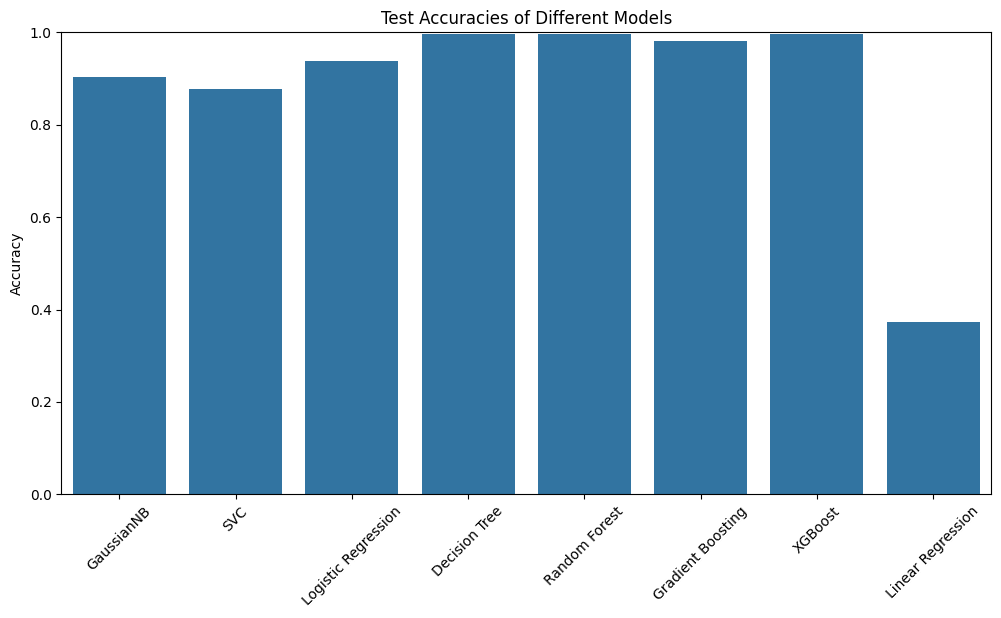

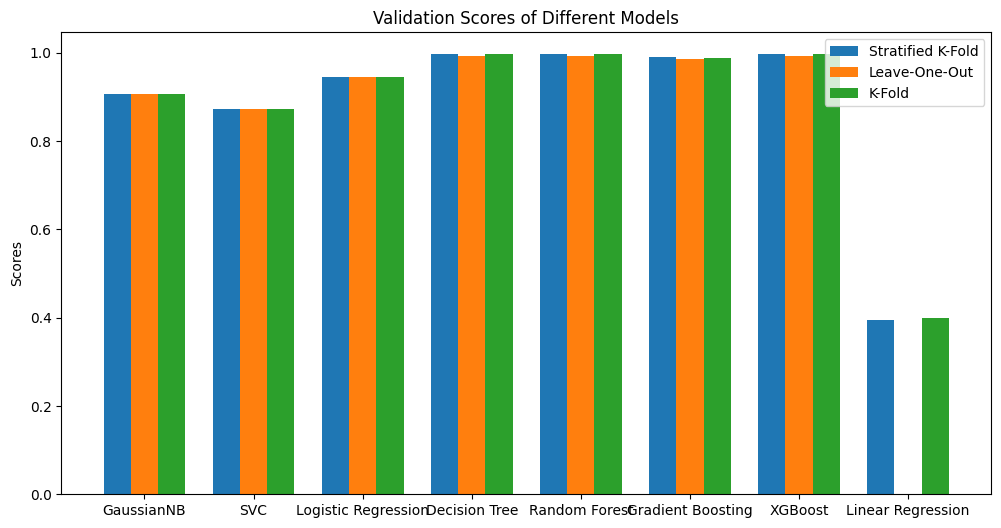

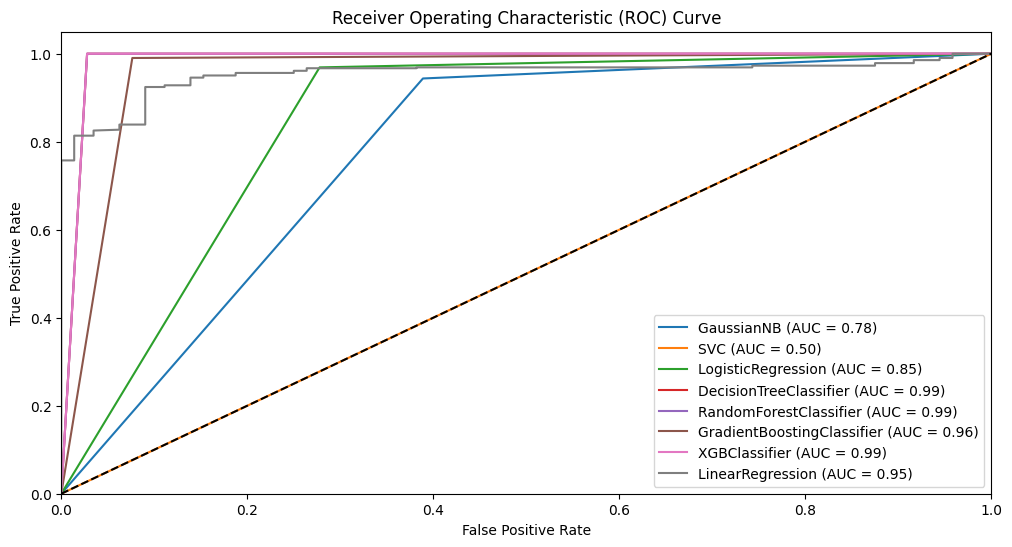

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Initialize lists to store results
models = ['GaussianNB', 'SVC', 'Logistic Regression', 'Decision Tree',
          'Random Forest', 'Gradient Boosting', 'XGBoost','Linear Regression']
test_accuracies = []
skfold_means = []
loocv_means = []
kf_means = []

# Store test accuracies and validation scores
# GaussianNB
test_accuracies.append(model_g.score(x_test, y_test))
skfold_means.append(skfold_score_mean_g)
loocv_means.append(loocv_score_mean_g)
kf_means.append(k_fold_score_mean_g)

# SVC
test_accuracies.append(model2.score(x_test, y_test))
skfold_means.append(skfold_score.mean())
loocv_means.append(loocv_score.mean())
kf_means.append(avg_score)

# Logistic Regression
test_accuracies.append(model_lr.score(x_test, y_test))
skfold_means.append(skfold_score_mean_lr)
loocv_means.append(loocv_score_mean_lr)
kf_means.append(kf_avg_score_lr)

# Decision Tree
test_accuracies.append(model_dt.score(x_test, y_test))
skfold_means.append(skfold_score_mean_dt)
loocv_means.append(loocv_score_mean_dt)
kf_means.append(kf_avg_score_dt)

# Random Forest
test_accuracies.append(model_rf.score(x_test, y_test))
skfold_means.append(skfold_score_mean_rf)
loocv_means.append(loocv_score_mean_rf)
kf_means.append(kf_avg_score_rf)

# Gradient Boosting
test_accuracies.append(model_gb.score(x_test, y_test))
skfold_means.append(skfold_score_mean_gb)
loocv_means.append(loocv_score_mean_gb)
kf_means.append(kf_avg_score_gb)

# XGBoost
test_accuracies.append(model_xgb.score(x_test, y_test))
skfold_means.append(skfold_score_mean_xgb)
loocv_means.append(loocv_score_mean_xgb)
kf_means.append(kf_avg_score_xgb)

# Linear
test_accuracies.append(model_lre.score(x_test, y_test))
skfold_means.append(skfold_score_mean_lre)
loocv_means.append(loocv_score_mean_lre)
kf_means.append(kf_avg_score_lre)

# Plotting Test Accuracies
plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=test_accuracies)
plt.title('Test Accuracies of Different Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Plotting Validation Scores
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, skfold_means, width, label='Stratified K-Fold')
rects2 = ax.bar(x, loocv_means, width, label='Leave-One-Out')
rects3 = ax.bar(x + width, kf_means, width, label='K-Fold')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Validation Scores of Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

# ROC Curve
plt.figure(figsize=(12, 6))
for model, y_pred in zip([model_g, model2, model_lr, model_dt, model_rf, model_gb, model_xgb,model_lre],
                         [y_pred, y_pred2, y_pred_lr, y_pred_dt, y_pred_rf, y_pred_gb, y_pred_xgb,y_pred_lre]):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, recall_score, roc_auc_score

# Initialize a list to store the results
results = []

# Function to calculate specificity
def specificity(confusion):
    TN, FP, FN, TP = confusion.ravel()
    return TN / (TN + FP)

# Calculate metrics for each model using different cross-validation methods
for model, y_pred, skfold_score, loocv_score, kf_score in zip(
    [model_g, model2, model_lr, model_dt, model_rf, model_gb, model_xgb,model_lre],
    [y_pred, y_pred2, y_pred_lr, y_pred_dt, y_pred_rf, y_pred_gb, y_pred_xgb,y_pred_lre],
    [skfold_score_g,skfold_score, skfold_score_lr, skfold_score_dt, skfold_score_rf, skfold_score_gb, skfold_score_xgb,skfold_score_mean_lr],
    [loocv_score_g,loocv_score, loocv_score_lr, loocv_score_dt, loocv_score_rf, loocv_score_gb, loocv_score_xgb,loocv_score_mean_lre],
    [k_fold_score_mean_g,avg_score, kf_avg_score_lr, kf_avg_score_dt, kf_avg_score_rf, kf_avg_score_gb, kf_avg_score_xgb,kf_avg_score_lre]
):
    # Calculate metrics for the test set
    acc = model.score(x_test, y_test)

    # Store results for the test set
    results.append({
        'Model': model.__class__.__name__,
        'Testing Accuracy': acc,
        'K-Fold': kf_score.mean(),
        'Stratified K-Fold': skfold_score.mean(),
        'Leave-One-Out': loocv_score.mean()
    })

# Create a DataFrame
results_df = pd.DataFrame(results)

# Identify the best model based on Testing Accuracy
best_model = results_df.loc[results_df['Testing Accuracy'].idxmax()]

# Display the comparison table
print(results_df)

# Display the best model
print("\nBest Model:")
print(best_model)

                        Model  Testing Accuracy    K-Fold  Stratified K-Fold  \
0                  GaussianNB          0.902979  0.906149           0.906149   
1                         SVC          0.877447  0.873786           0.873787   
2          LogisticRegression          0.938723  0.945665           0.944304   
3      DecisionTreeClassifier          0.996596  0.996764           0.996764   
4      RandomForestClassifier          0.996596  0.996764           0.996764   
5  GradientBoostingClassifier          0.982128  0.988928           0.990972   
6               XGBClassifier          0.996596  0.996764           0.996764   
7            LinearRegression          0.372580  0.398994           0.944304   

   Leave-One-Out  
0       0.906149  
1       0.873786  
2       0.945154  
3       0.993528  
4       0.993528  
5       0.987055  
6       0.993528  
7            NaN  

Best Model:
Model                DecisionTreeClassifier
Testing Accuracy                   0.996596
K-Fold 